# Simulating a Datom in 2D

We want to simulate 2 monads in dynamic conditions at different sizes to find out the forces required and therefore assess the scalability of the design both upwards and downwards.
Because of the symmetries of the design we can the model to just simulate the faces involved in the movement for each monad, and consider the rest to be rigid.

In [5]:
from math import sqrt, cos, sin
from matplotlib import pyplot as plt
from matplotlib import collections as mc
import numpy as np

## Describing the monad

The monad can be fully described by its **radius**, the **friction** at the joints and the **density** of the material it's made out of.
For the purposes of this model we assume the monad is fully made out of nylon with a density of 1.15x10^3 kg/m^3

In [27]:
radius = 0.075
face_length = (2 * radius) / (3 * sqrt(2) - 1)
link_length = radius * ((2 - sqrt(2)) / (3 * sqrt(2) - 1))

thickness = radius / 25

piston_extension_max = link_length + face_length / sqrt(2)

density = 1.15e3
gravity = 9.8

face_volume = face_length ** 2 * thickness
link_volume = link_length * face_length * thickness

n_faces = 18
n_links = 24

monad_mass = (face_volume * n_faces + link_volume * n_links) * density * 1.5

print(f'radius = {radius*1000} mm\nface length = {face_length*1000} mm\nlink lenght = {link_length*1000} mm\nmonad mass = {monad_mass} kg')

radius = 75.0 mm
face length = 46.258594298111326 mm
link lenght = 13.548828581759444 mm
monad mass = 0.2771700512112511 kg


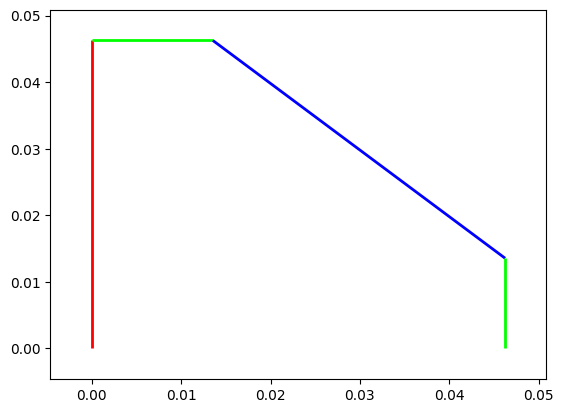

In [28]:
linkages = [[(0.0, 0.0), (0.0, piston_extension_max)], 
            [(0.0, piston_extension_max), (link_length,piston_extension_max)], 
            [(link_length,piston_extension_max), (piston_extension_max, link_length)],
            [(piston_extension_max, link_length), (piston_extension_max, 0)]]

colours = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1), (0, 1, 0, 1)])

lc = mc.LineCollection(linkages, colors=colours, linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [14]:
def draw_mechanism(piston_extension):
    link_origin = (0.0,piston_extension*piston_extension_max)
    face_origin = (piston_extension_max, link_length)

    dx = link_origin[0] - face_origin[0]
    dy = link_origin[1] - face_origin[1]
    d = sqrt(dx**2+dy**2)

    if d > link_length+face_length:
        print("centres too distant")
        return None
    if d < abs(link_length-face_length):
        ()
        return None # no solutions because one circle is contained within the other
    if d == 0 and link_length == face_length:
        return None # circles are coincident and there are an infinite number of solutions 

    a = (link_length**2-face_length**2+d*d)/(2*d)
    h = sqrt(link_length**2-a**2)
    xm = link_origin[0] + a*dx/d
    ym = link_origin[1] + a*dy/d
    xs1 = xm + h*dy/d
    xs2 = xm - h*dy/d
    ys1 = ym - h*dx/d
    ys2 = ym + h*dx/d

    return (xs1,ys1),(xs2,ys2)

In [19]:
from shapely import Point
